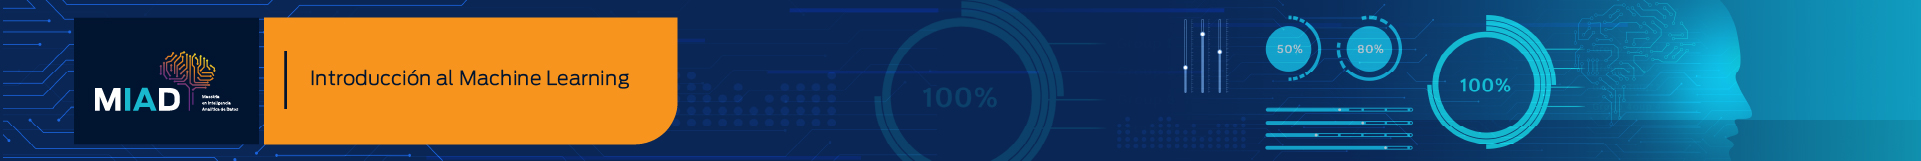

# Introducción al Machine Learning - Semana 4
## Caso: Implementación de modelos no lineales aditivos en un problema de regresión

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos no lineales aditivos y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos MARS y GAM.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:  

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación de modelos lineales: Se estiman los tres modelos lineales solicitados, se evalúan en test y se concluye correctamente qué modelo tiene mayor capacidad predictiva. [10 puntos] 

Estimación del modelo MARS: Se estima el modelo MARS correctamente [15 puntos] 

Interpretación de predictores MARS: Se interpretan al menos tres predictores en el modelo MARS y no se presentan errores en este análisis. [15 puntos] 

Estimación del modelo GAM: Se estima el modelo GAM correctamente [10 puntos] 

Interpretación de predictores GAM: Se interpretan los mismos predictores que en el modelo MARS y no presenta errores en su análisis. [10 puntos] 

Conclusión sobre la primera hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos] 

Conclusión sobre la segunda hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos]

### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Carseats", la cual contiene 10 variables predictivas. De esta manera, el objetivo de la actividad es predecir la variable de ventas "Sales".

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://drive.google.com/file/d/1EFU-7CKbUGBcqTxcNgkEFaHuyRWyNrzj/view?usp=drive_link


In [1]:
#  Cargar librerías
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import TimeSeriesSplit


In [2]:
#Cargar datos
df = pd.read_csv("Carseats.csv", sep=",")
df

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
# Se eliminar filas con valores faltantes en caso de haber y la variable que indific acantidad de registros (Unnamed: 0)
df = df.dropna(subset=['Sales']).reset_index(drop=True)
df=df.drop(columns=['Unnamed: 0'], errors='ignore')
XTotal = df.drop(columns=['Sales', 'Unnamed: 0'], errors='ignore').to_numpy()
YTotal = df['Sales'].to_numpy()

In [4]:
#División de train y test con 33% en test
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, YTotal, test_size=0.33, random_state=0)

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [5]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    str    
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    str    
 10  US           400 non-null    str    
dtypes: float64(1), int64(7), str(3)
memory usage: 38.5 KB


In [6]:
print(df.shape)
df.describe()

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


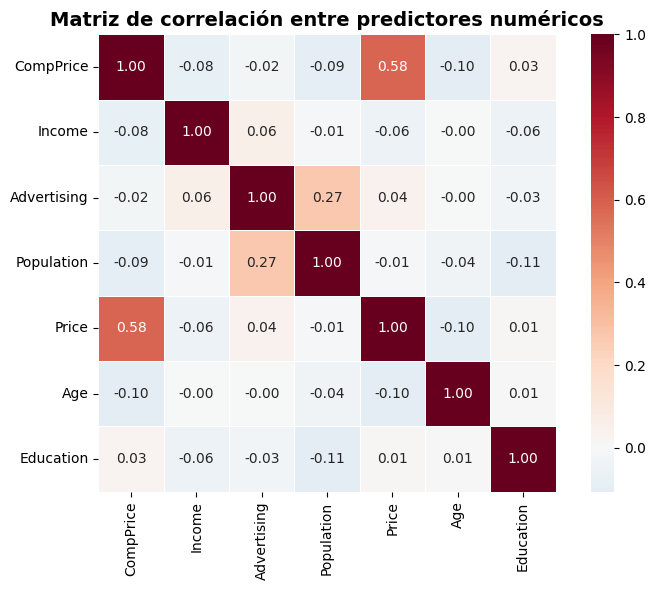

In [7]:
# Correlograma: matriz de correlación + heatmap (multicolinealidad)
cols_num = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
corr_mat = df[cols_num].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax)
ax.set_title('Matriz de correlación entre predictores numéricos', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_27380\2154478342.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eda_lags, x='Variable', y='Valor', palette='viridis')


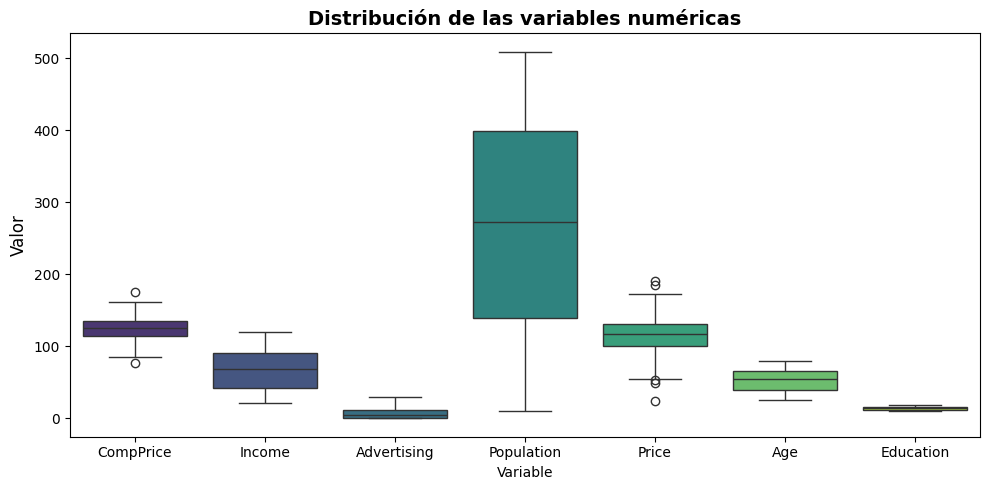

In [8]:
# Boxplot múltiple: Lag1 a Lag5
cols_num = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
eda_lags = df[cols_num].melt(var_name='Variable', value_name='Valor')

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=eda_lags, x='Variable', y='Valor', palette='viridis')
ax.set_title('Distribución de las variables numéricas', fontsize=14, fontweight='bold')
ax.set_ylabel('Valor', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

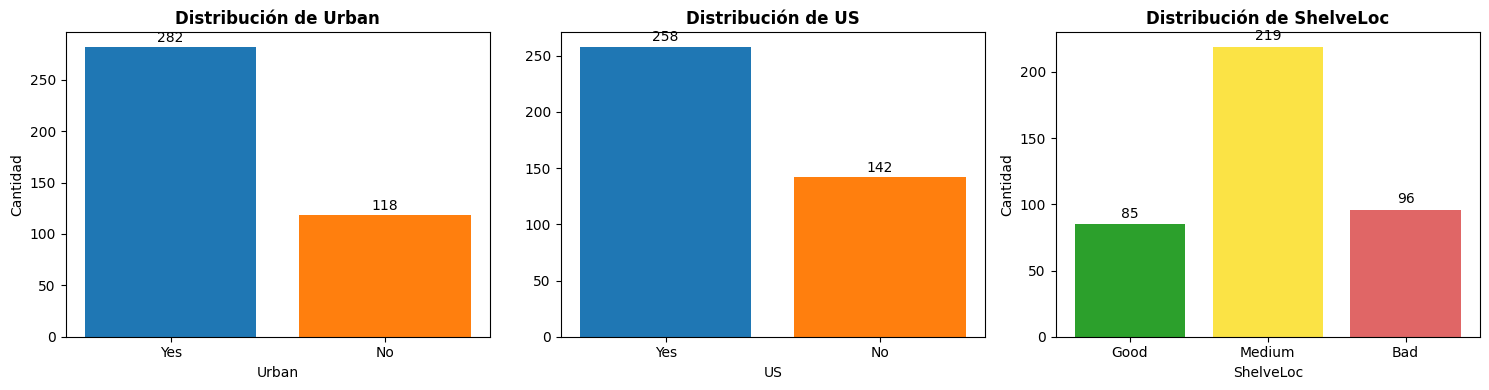

In [9]:

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

urban = df['Urban'].value_counts()
axes[0].bar(urban.index, urban.values, color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Distribución de Urban', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Urban')
axes[0].set_ylabel('Cantidad')
for i, v in enumerate(urban.values):
    axes[0].text(i, v + 5, str(v), ha='center')

# Gráfico para US
us= df['US'].value_counts()
axes[1].bar(us.index, us.values, color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Distribución de US', fontsize=12, fontweight='bold')
axes[1].set_xlabel('US')
for i, v in enumerate(us.values):
    axes[1].text(i, v + 5, str(v), ha='center')

# Gráfico para ShelveLoc
shelve = df['ShelveLoc'].value_counts().reindex(['Good', 'Medium', 'Bad'])
axes[2].bar(shelve.index, shelve.values, color=['#2ca02c', "#fbe345", "#E06666"])
axes[2].set_title('Distribución de ShelveLoc', fontsize=12, fontweight='bold')
axes[2].set_xlabel('ShelveLoc')
axes[2].set_ylabel('Cantidad')
for i, v in enumerate(shelve.values):
    axes[2].text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()

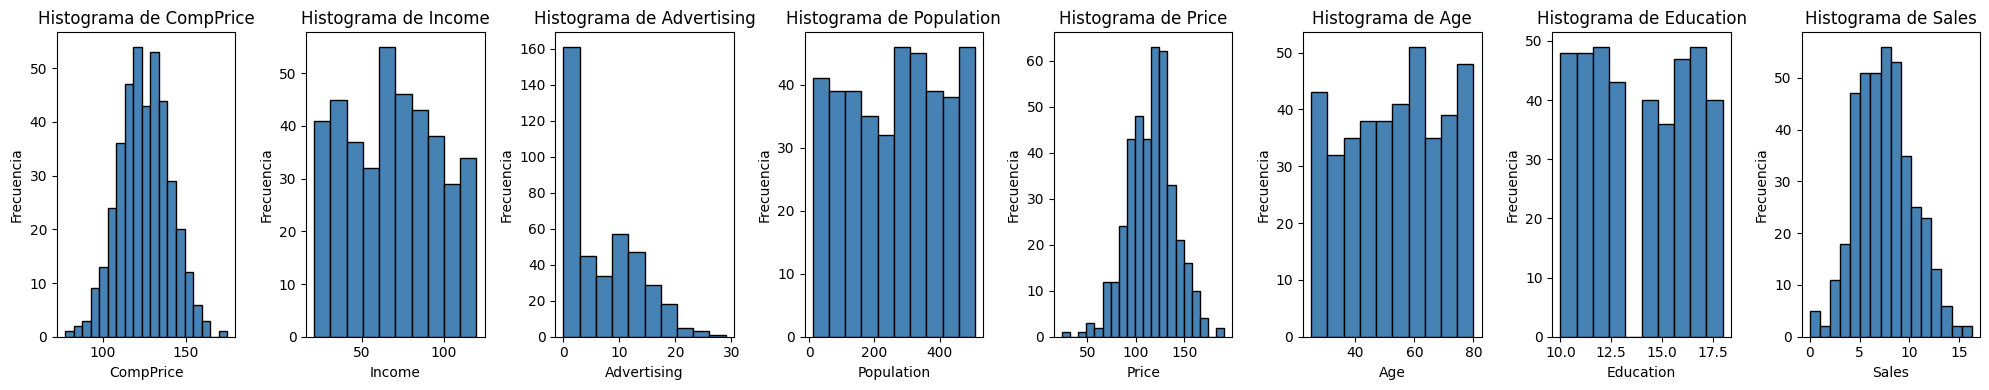

In [10]:
hist = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Sales']

fig, axes = plt.subplots(1, len(hist), figsize=(20, 4))
for ax, col in zip(axes, hist):
    ax.hist(df[col], bins='auto', color='steelblue', edgecolor='black')
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)
#### Análisis y Conclusión 1
**Procedimiento EDA:** e llevó a cabo un análisis exploratorio sobre el dataset Carseats, incluyendo la revisión de la estructura y tipos de variables, estadísticas descriptivas, análisis de la distribución de la variable respuesta (Sales), boxplots de las variables predictoras, matriz de correlación mediante heatmap, análisis de distribución de las variables categóricas mediante conteo por categorías, así como gráficos de dispersión e histogramas para las variables continuas y la variable respuesta.

**Estatisitca descriptuva:** 

* El dataset tiene 10 variables, de las cuales 3 son categóricas (ShelveLoc, Urban, US) y 7 numéricas. Cuenta con 400 observaciones y no se presentan valores faltantes, lo cual facilita la aplicación posterior, ya que no será necesario realizar imputaciones ni eliminar observaciones, algo importante considerando que el tamaño de la muestra es relativamente limitado. Adicionalmente, es importante tener en cuenta que algunas variables se encuentran expresadas en diferentes escalas o unidades ( Sales, population, advertising, income), lo cual debe considerarse durante la interpretación inicial de los resultados. Para el modelamiento, será necesario tener en cuenta estas diferencias de escala, ya que pueden influir en el desempeño de ciertos modelos si no se hace la conversión de unidades.

* Las variables Income, Population y Price son las que presentan mayor desviación estándar. Esto puede influir en modelos sensibles a la escala, ya que existe una diferencia considerable entre magnitudes y además presentan alta variabilidad. Por ello, sería recomendable estandarizar las variables antes de la implementación de los modelos.

* Se presentan 3 variables categóricas que permiten incluir características del mercado, como la ubicación en estanterías, si la observación corresponde a Estados Unidos o el carácter urbano del área. No se recomienda eliminarlas, debido a que pueden brindar información relevante para la predicción. En su lugar, se recomienda transformarlas mediante variables dummy para convertirlas en variables numéricas y mantener la información.

* La variable a predecir hace referencia a las unidades vendidas en miles. Esta variable no posee valores nulos, lo cual evita la necesidad de eliminar observaciones. Presenta un mínimo de 0 ventas y un máximo cercano a 16 mil. La media y la mediana se encuentran relativamente cercanas, lo cual sugiere, a priori, ausencia de outliers extremos que generen ruido significativo en el dataset.


**Heatmap:** Frente al diagrama heatmap de correlaciones se puede extraer información importante. La mayoría de las relaciones entre variables presentan correlaciones débiles o prácticamente nulas, por lo que pueden pasar desapercibidas. Sin embargo, resaltan dos casos específicos:

* price y comprice: Estas variables presentan una correlación positiva media-alta (0.58). Esta relación tiene sentido, ya que se está comparando el precio del producto con el precio del competidor; al tratarse de productos similares, es consistente que los valores se relacionen y se muevan en la misma dirección. A priori, algunos modelos de selección de variables podrían considerar eliminar una de ellas debido a posible colinealidad.

* population y advertising: Estas variables presentan una correlación positiva débil-media (0.27). Esto puede explicarse porque, a mayor población en un área, es razonable esperar mayores niveles de inversión en publicidad. Aunque la relación tiene sentido desde una perspectiva real, la correlación no es lo suficientemente fuerte como para generar un impacto significativo en modelos sensibles a multicolinealidad.

**Boxplot:**

* Frente a los boxplots se puede observar que, en principio, las variables no presentan una cantidad significativa de outliers. En particular, las variables Income, Advertising, Population, Age y Education no muestran valores atípicos relevantes, lo cual sugiere que la información tiene buena consistencia y podría representar adecuadamente a la población analizada.

* En cuanto a las variables CompPrice y Price, se identifican algunos pocos outliers; sin embargo, estos se encuentran relativamente cercanos a los límites definidos por el rango intercuartílico, por lo que no parecen ser extremos. Por esta razón, a priori, estos valores no deberían generar un impacto significativo en los resultados y se puede considerar que el dataset presenta datos adecuados para trabajar y modelar de forma confiable. Esto indica que no será necesario realizar una limpieza adicional ni aplicar transformaciones agresivas a los datos.

* En cuanto a la escala, se puede observar, como se mencionó en la estadística descriptiva, que las variables presentan magnitudes muy diferentes, por lo que será necesario estandarizarlas para evitar que los modelos se vean sesgados por esta diferencia. Esto es especialmente relevante en el caso de población, que presenta el mayor rango de valores y una escala considerablemente superior al resto.

**Distribución Categoricas:**

* Frente a Urban y US, la mayoría de las observaciones indican que se encuentran en áreas urbanas y dentro del territorio de Estados Unidos. Esto podría generar cierto sesgo en la predicción, ya que las ventas estarían representando principalmente una parte específica de la población entonces es importante mantener la info para saber contexto geográfico de las ventas.
* En cuanto a ShelveLoc, que hace referencia a la ubicación en estanterías, se observa que las categorías de buena y mala ubicación se encuentran relativamente cercanas entre sí; sin embargo, la mayoría de las observaciones se concentran en la categoría de ubicación media.
* Las tres variables categóricas presentan una cantidad considerable de observaciones en cada una de sus categorías, lo cual indica que pueden aportar información relevante para la predicción y no deberían eliminarse. Por esta razón, para los modelos se realizará one-hot encoding con el fin de convertirlas en variables dummy y conservar la información. En caso de que alguna variable tuviera aproximadamente un 90% de las observaciones en una misma categoría, podría evaluarse su exclusión del modelamiento.

**Distribución Continuas:**

* Los campos CompPrice, Price y Sales se pueden asemejar a una distribución aproximadamente normal, ya que se observa una forma de campana relativamente simétrica similar a una distribución gaussiana.
* Los campos Income, Population, Age y Education, aunque no siguen perfectamente una distribución uniforme, presentan una frecuencia relativamente constante a lo largo de su rango de valores, lo cual sugiere que la muestra está distribuida de manera relativamente homogénea dentro de los intervalos observados.
* Advertising es la única muestra con una distribución asimétrica con sesgo hacia valores bajos, concentrando principalmente observaciones entre 0 y 15. Aunque existen valores superiores a 20 e incluso cercanos a 30, estos aparecen con muy baja frecuencia, lo que evidencia una cola hacia valores altos y una mayor concentración en valores pequeños.

### 2. Estimación de modelos lineales  (25 puntos)
Encuentren el modelo lineal que mejor predice la variable "Sales" entre Lasso, PCA, PLS. Para esto, estimen los modelos usando la muestra de entrenamiento y evalúen el poder predictivo en la muestra de test. Describan su procedimiento y analicen los resultados.

In [ ]:
catcols = df.select_dtypes(exclude=['int64', 'float64']).columns
df_dummies = pd.get_dummies(df, columns=catcols, dtype=int, drop_first=True)
df_dummies



,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)
#### Análisis y Conclusión 2

### 3. Estimación del modelo GAM e interpretación de predictores (55 puntos)
3.a) Estimen un modelo GAM para predecir la variable "Sales". (10 puntos)

3.b) Interpreten el efecto de 3 predictores (15 puntos)

3.c) Prueben la teoría que afirma que las variables "Price" y "Population" no deben ser incluidas en el modelo. (15 puntos)

3.d) Prueben la teoría que afirma que el efecto de la variable "Income" debe ser lineal. (15 puntos)

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)
#### Análisis y Conclusión 3

### 4. Concluir sobre la capacidad predictiva de los modelos (10 puntos)
¿Cuál modelo de los estimados en los apartados 2 y 3.a resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 4)
#### Análisis y Conclusión 4